# COMP 4030 / 6030 Assignment 7

**Due: Monday, 4/26/2023, before midnight.**

YOUR NAME:

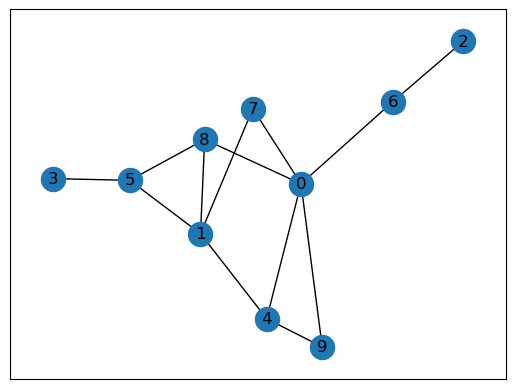

In [1]:
import networkx as nx
G = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)

A network of stations and roads, which connect stations together in some way, can be represented as a graph with nodes and edges.

Run the code below, you see a network with 10 stations and 13 roads.
```
import networkx as nx
G = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)
```

---

Each question is worth 30 points.  There're a total of 20 bonus points.

---

**Problem 1**

We are given a network of stations (nodes) and roads (edges), write a program that determines if a set of cameras placed at the stations can watch over all roads in a network. 

If a camera is placed at station (node) 0, then all the roads (edges) connected to 0 can be watched (presumably by a security guard).

In the example above, if a camera is placed at node 0, then all of these 5 roads connected to it will be watched: (0,4), (0,6), (0,7), (0,8), (0,9).

This program has inputs: a **network**, a list of **camera_placement**, which specify which stations have cameras.  For example, this list of camera_placement: [True, True, False, False, False, False, False, False, False, True] means that stations 0, 1, and 9 have cameras.

The program returns True if all roads in the network are watched, and False otherwise.

ANSWER:

First, we'll define get_nodes that extract the nodes where camera are placed.

```
get_nodes([True, True, False, False, False, False, False, False, False, True])
```
should return [0, 1, 9].

Second, we'll go through each edge of the network.  If there's an edge (u,v), for which neither u nor v is in the list of nodes that have cameras, then the network is not completely watched.

In [4]:
#
# Input: network
#        camera_placement -- a list of booleans indicating which stations have cameras.
# Output: True - if all roads in the network are watched.
#         False - if some road is not watched by any camera.
#
#
def is_watched(network, camera_placement):
    nodes = get_nodes(camera_placement)
    for u,v in network.edges:
        if u not in nodes and v not in nodes:
            print('The edge', (u,v), 'is not watched by cameras placed at', nodes)
            return False
    print('The network is watched by cameras placed at', nodes)
    return True

def get_nodes(camera_placement):
    return [i for i in range(len(camera_placement)) if camera_placement[i]==True]

In [5]:
get_nodes([True, True, False, False, False, False, False, False, False, True])

[0, 1, 9]

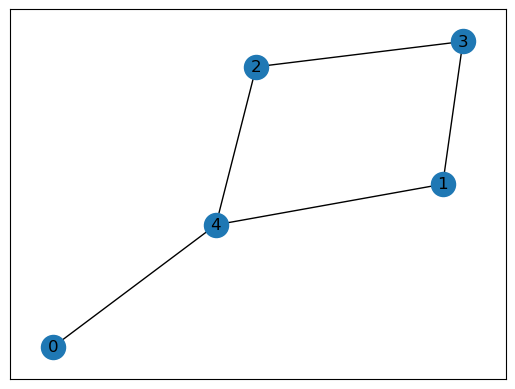

In [23]:
G = nx.gnp_random_graph(5, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)

In [24]:
is_watched(G, [False, False, False, False, True])

The edge (1, 3) is not watched by cameras placed at [4]


False

In [25]:
is_watched(G, [False, False, False, True, True])

The network is watched by cameras placed at [3, 4]


True

---

**Problem 2**

Use backtracking to find all camera placements, each of which can watch all roads of a network.



In [41]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]

def generate(solution, i, possibilities, is_valid, g):
    if i==len(solution):
        if is_valid(g, solution):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, is_valid, g)

In [42]:
def possibilities(solution, i, g):
    return [True, False]

def is_watched(network, camera_placement):
    nodes = get_nodes(camera_placement)
    for u,v in network.edges:
        if u not in nodes and v not in nodes:
            # print('The edge', (u,v), 'is not watched by cameras placed at', nodes)
            return False
    # print('The network is watched by cameras placed at', nodes)
    return True

def get_nodes(camera_placement):
    return [i for i in range(len(camera_placement)) if camera_placement[i]==True]

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 5]
[0, 1, 2, 4, 5]
[0, 1, 2, 4]
[0, 1, 3, 4, 5]
[0, 1, 3, 5]
[0, 1, 4, 5]
[0, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4]
[1, 2, 4, 5]
[1, 2, 4]
[1, 3, 4, 5]
[1, 4, 5]
[2, 3, 4, 5]


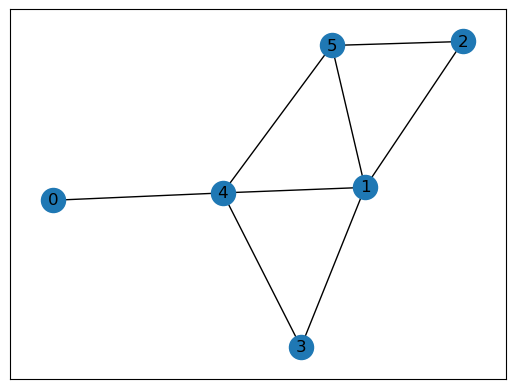

In [71]:
G = nx.gnp_random_graph(6, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)
generate([None]*len(G), 0, possibilities, is_watched, G)

---

**Problem 3**

Suppose we want to impose the following condition: placing a camera at the station(s) that is/are connected to the most number of roads.  For example, in the network above, node 0 is connected to the most number of roads (5 of them).  We want a camera to be placed at this node/station.

Again, use backtracking to list all camera placements, each of which watches all roads, but with the additional requirement of having cameras at the most-connected node(s).

Hints:
+ Find out which nodes are most connected.
+ Modify "possibilities" to take into account this requirement.  It might need one extra parameter.
+ Use the same backtracking algorithm.

ANSWER:

First, we'll find the node(s) with the most number of connections.

Second, we modify "possibilities" to select return the only possiblity of "True" for a node that must be selected.

Third, we use the same "generate" template to generate all camera placements given these new revisions.

In [111]:
def most_connected_nodes(network):
    data = [(len(list(network.neighbors(v))), v) for v in network.nodes ]
    data = sorted(data, reverse=True)
    nodes = [v for (nv, v) in data if nv==data[0][0]]
    return nodes

def possibilities(solution, i, g, must_selected):
    if i in must_selected:
        return [True]
    return [True, False]


In [112]:
def generate(solution, i, possibilities, is_valid, g, must_selected):
    if i==len(solution):
        if is_valid(g, solution):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g, must_selected):
            solution[i] = possibility
            generate(solution, i+1, possibilities, is_valid, g, must_selected)


def is_watched(network, camera_placement):
    nodes = get_nodes(camera_placement)
    for u,v in network.edges:
        if u not in nodes and v not in nodes:
            return False
    return True

def get_nodes(camera_placement):
    return [i for i in range(len(camera_placement)) if camera_placement[i]==True]


[6, 1]

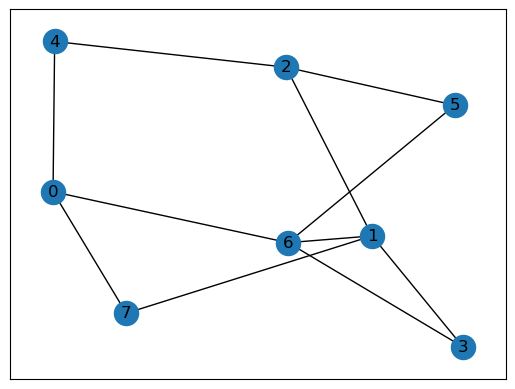

In [114]:
G = nx.gnp_random_graph(8, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)
most_connected_nodes(G)

In [116]:
G = nx.gnp_random_graph(8, 0.35, seed=2023)
must_selected = most_connected_nodes(G)
print('Must select these nodes:', must_selected)
generate([None]*len(G), 0, possibilities, is_watched, G, must_selected)

Must select these nodes: [6, 1]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 6, 7]
[0, 1, 2, 3, 4, 6]
[0, 1, 2, 3, 5, 6, 7]
[0, 1, 2, 3, 5, 6]
[0, 1, 2, 3, 6, 7]
[0, 1, 2, 3, 6]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6]
[0, 1, 2, 4, 6, 7]
[0, 1, 2, 4, 6]
[0, 1, 2, 5, 6, 7]
[0, 1, 2, 5, 6]
[0, 1, 2, 6, 7]
[0, 1, 2, 6]
[0, 1, 3, 4, 5, 6, 7]
[0, 1, 3, 4, 5, 6]
[0, 1, 4, 5, 6, 7]
[0, 1, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 6, 7]
[1, 2, 4, 5, 6, 7]
[1, 2, 4, 6, 7]
[1, 3, 4, 5, 6, 7]
[1, 4, 5, 6, 7]


---

**Problem 4**

Use backtracking to find a camera placements with the fewest number of cameras that can watch all roads of a network.

Hints:
+ Modify your backtracking program to carry along an "optimal placement" (one that keeps track of valid placements) and update it along the way.
+ When you update the optimal placement, make sure you duplicate the solution.  You don't want to point the optimal placement variable to the solution. You want to duplicate it.


ANSWER:

First, we initialize a "minimal_placement" with all nodes selected (set to True).

Then, we pass this variable along through the backtracking process and update it (on lines 18-20).

In [110]:
def possibilities(solution, i, g):
    return [True, False]

def is_watched(network, camera_placement):
    nodes = get_nodes(camera_placement)
    for u,v in network.edges:
        if u not in nodes and v not in nodes:
            # print('The edge', (u,v), 'is not watched by cameras placed at', nodes)
            return False
    # print('The network is watched by cameras placed at', nodes)
    return True

def get_nodes(camera_placement):
    return [i for i in range(len(camera_placement)) if camera_placement[i]==True]

def generate(solution, i, possibilities, is_valid, g, minimal_placement):
    if i==len(solution):
        if is_valid(g, solution) and len(get_nodes(solution)) < len(get_nodes(minimal_placement)):
            for i in range(len(solution)):
                minimal_placement[i] = solution[i]
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, is_valid, g, minimal_placement)

The minimal placement is [0, 3, 5]


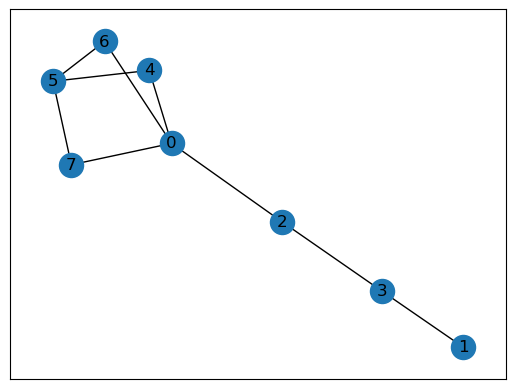

In [109]:
G = nx.gnp_random_graph(8, 0.35)
nx.draw_networkx(G, with_labels=True)
minimal_placement = [True]*len(G)
# print(get_nodes(minimal_placement))
generate([None]*len(G), 0, possibilities, is_watched, G, minimal_placement)
print('The minimal placement is', get_nodes(minimal_placement))